## Task-D: Collinear features and their effect on linear models

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
#Mounting Google drive folder
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Appliedai colab/Assignment 8 - Linear models/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Appliedai colab/Assignment 8 - Linear models


In [0]:
data = pd.read_csv('task_d.csv')

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [0]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#1. Finding the Correlation between the features


###a. check the correlation between the features
    

In [8]:
corr = data.corr() 
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


### b. plot heat map of correlation matrix using seaborn heatmap

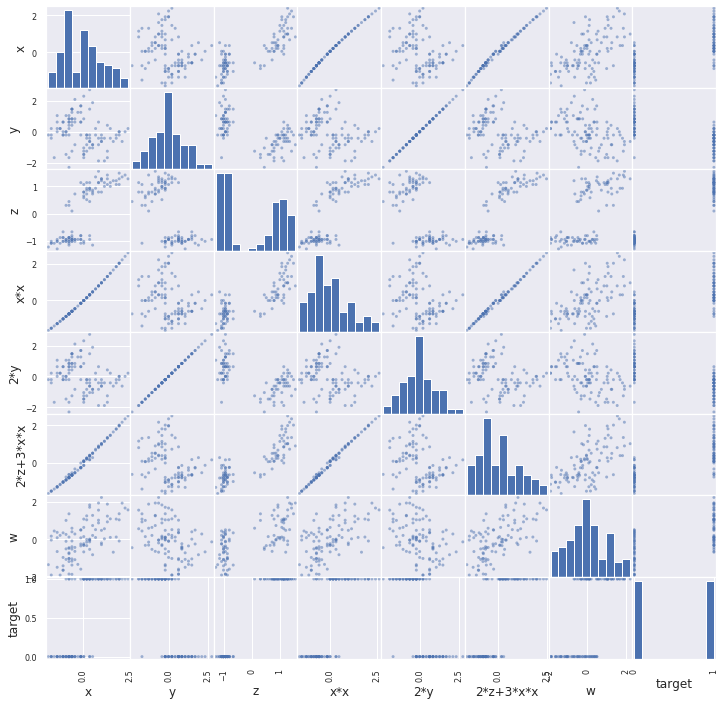

In [7]:
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

In [0]:
#https://www.geeksforgeeks.org/download-anything-to-google-drive-using-google-colab/
path = '/content/drive/My Drive/Appliedai colab/Assignment 8 - Linear models/'
import requests  
file_url = "https://raw.githubusercontent.com/drazenz/heatmap/master/heatmap.py"
    
r = requests.get(file_url, stream = True)  
  
with open(path+"heatmap.py", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block) 

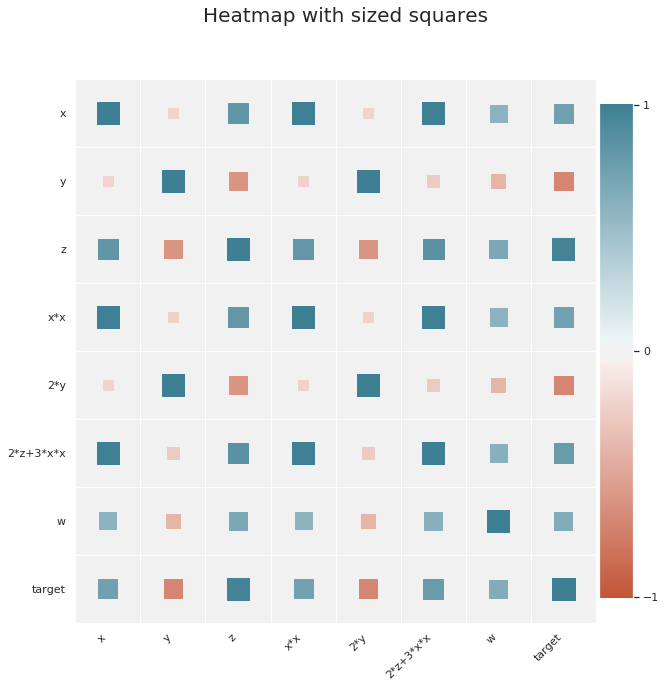

In [11]:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
#https://github.com/drazenz/heatmap/blob/master/heatmap.py

from heatmap import heatmap, corrplot

plt.figure(figsize=(10, 10)).suptitle('Heatmap with sized squares', fontsize=20);
corrplot(corr)

# 2. Finding the best model for the given data
### a. Train Logistic regression on data(X,Y) that we have created in the above cell

In [0]:
clf = LogisticRegression().fit(X, Y)

### b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)

In [14]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, n_jobs = -1, verbose = 2)
clf.fit(X, Y)
clf.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.7s finished


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004715,0.000987,0.000491,0.000057,0.001,newton-cg,"{'C': 0.001, 'solver': 'newton-cg'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007045,0.004496,0.000432,0.000048,0.001,lbfgs,"{'C': 0.001, 'solver': 'lbfgs'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.000757,0.000156,0.000397,0.000026,0.001,liblinear,"{'C': 0.001, 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.001411,0.000189,0.000791,0.000813,0.001,sag,"{'C': 0.001, 'solver': 'sag'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.001396,0.000122,0.000405,0.000029,0.001,saga,"{'C': 0.001, 'solver': 'saga'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


### c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [0]:
best_model = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg')

# 3. Getting the weights with the original data
## a. train the 'best_model' with X, Y


In [20]:
best_model.fit(X, Y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## b. Check the accuracy of the model 'best_model_accuracy'


In [0]:
best_model_accuracy = best_model.score(X, Y)

## c. Get the weights W using best_model.coef_

In [0]:
W = best_model.coef_

# 4. Modifying original data
### a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)


In [23]:
X.shape

(100, 7)

In [0]:
# creating a noise with the same dimension as the dataset (100,7)
# source - https://stackoverflow.com/a/46093600/9292995
noise = np.random.normal(0.01, 0.01, [100,7])

In [0]:
X_noise = X + noise

### b. Train the same 'best_model' with data (X', Y)


In [26]:
best_model.fit(X_noise, Y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### c. Check the accuracy of the model 'best_model_accuracy_edited'


In [0]:
best_model_accuracy_edited = best_model.score(X_noise,Y)

### d. Get the weights W' using best_model.coef_

In [0]:
W_noise = best_model.coef_

#5.  Checking deviations in metric and weights 
### a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [29]:
best_model_accuracy_edited - best_model_accuracy

0.0


### b. find the absolute change between each value of W and W' ==> |(W-W')|

In [30]:
abs(W - W_noise)

array([[8.96288255e-05, 8.94807891e-05, 4.66496288e-05, 1.19166451e-05,
        9.25985964e-05, 1.01621256e-05, 4.11553437e-05]])


### c. print the top 4 features which have higher % change in weights compare to the other feature

In [0]:
weight_change = abs(W - W_noise)
top_4_weights = -np.sort(-abs(weight_change))[0][0:4] #source - https://stackoverflow.com/a/55496638/9292995

In [32]:
weight_list = weight_change.tolist()[0]
print("top 4 features which have higher % change in weights compare to the other feature:")
for i in top_4_weights:
  print('feature',weight_list.index(i)+1)

top 4 features which have higher % change in weights compare to the other feature:
feature 5
feature 1
feature 2
feature 3
